<a href="https://colab.research.google.com/github/snimish12/Deep-Learning/blob/main/MNIT%20Fashion%20Dataset%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1 : MNIST fashion dataset classification

image types :
1 - Binary. (2D , Pixel - 0/1 , B/W image)
2 - Gray Scale. (2D , Pixel - [0-255,256 - color)
3 - R.G.B or truecolor (3D , Pixel R  = (0-255), G n= (0-255), B = (0-255)


In [ ]:
import tensorflow as tf
import numpy as np
fas_data = tf.keras.datasets.fashion_mnist
(train_image, train_label), (test_image,test_label) = fas_data.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# exploring the data
print(train_image.shape)

(60000, 28, 28)


In [ ]:
print(train_image.shape)

(60000, 28, 28)


In [ ]:
print(train_label[0:20])

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4]


In [ ]:
print(np.unique(train_label))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
print('Number of class',len(np.unique(train_label)))

Number of class 10


In [ ]:
print(test_image.shape)

(10000, 28, 28)


In [ ]:
print(np.unique(test_label))

[0 1 2 3 4 5 6 7 8 9]


(28, 28)


Text(0.5, 0, 'bag')

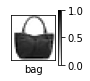

In [ ]:
i = 100 #image number
print(train_image[i].shape)
class_name = ['Tshirt/Top','Trouser','PullOver','Dress','Coat','Sandal','shirt','sneakers','bag','ankleboot']
######
import matplotlib.pyplot as plt
plt.figure(figsize = (1,1))
plt.imshow(train_image[i],cmap = plt.cm.binary)  #for colored image comment out 'cmap = plt.cm.binary'
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.xlabel(class_name[train_label[i]])

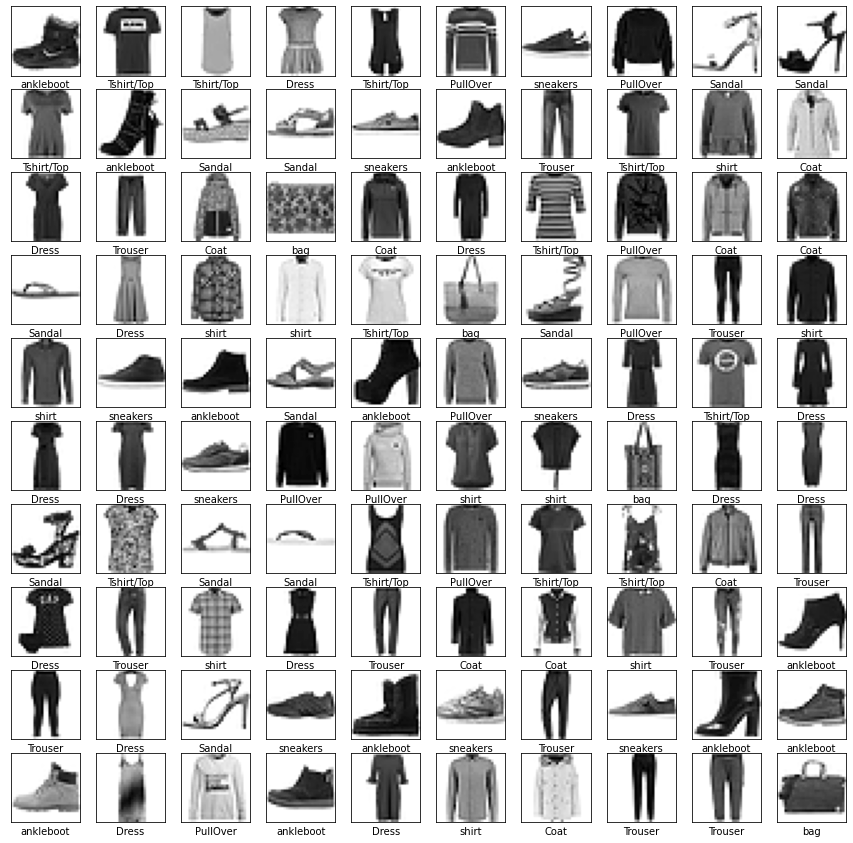

In [ ]:
plt.figure(figsize = (15,15))
for i in range(0,100):
  plt.subplot(10,10,i+1)
  plt.imshow(train_image[i],cmap = plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.xlabel(class_name[train_label[i]])
plt.show()

In [ ]:
#data preprossing
#input data = scaling pixel value [0-1]
train_image = train_image/255.0 #to convert it in binary
test_image = test_image/255.0


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28))) # 5x5 = 25x1
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
hist = model.fit(train_image,train_label,epochs = 10,validation_split =0.2, batch_size = 100)

Epoch 1/10
480/480 [==============================] - 2s 4ms/step - loss: 0.5684 - accuracy: 0.8020 - val_loss: 0.5200 - val_accuracy: 0.8131
Epoch 2/10
480/480 [==============================] - 2s 3ms/step - loss: 0.4587 - accuracy: 0.8404 - val_loss: 0.4584 - val_accuracy: 0.8408
Epoch 3/10
480/480 [==============================] - 2s 3ms/step - loss: 0.4447 - accuracy: 0.8453 - val_loss: 0.4424 - val_accuracy: 0.8456
Epoch 4/10
480/480 [==============================] - 2s 3ms/step - loss: 0.4319 - accuracy: 0.8491 - val_loss: 0.4642 - val_accuracy: 0.8363
Epoch 5/10
480/480 [==============================] - 2s 3ms/step - loss: 0.4242 - accuracy: 0.8519 - val_loss: 0.4867 - val_accuracy: 0.8315
Epoch 6/10
480/480 [==============================] - 2s 3ms/step - loss: 0.4194 - accuracy: 0.8526 - val_loss: 0.4535 - val_accuracy: 0.8443
Epoch 7/10
480/480 [==============================] - 2s 3ms/step - loss: 0.4148 - accuracy: 0.8537 - val_loss: 0.4378 - val_accuracy: 0.8499
Epoch 

In [ ]:
model.save("FashionMNISTmodel")

In [ ]:
test_loss,test_acc = model.evaluate(test_image,test_label)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4768 - accuracy: 0.8371
0.8371000289916992


In [ ]:
d = hist.history
d.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

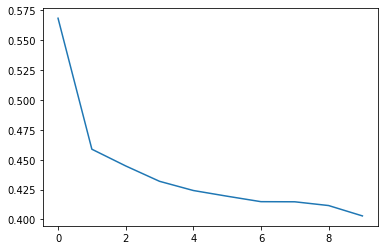

In [ ]:
plt.plot(range(10),d['loss'])

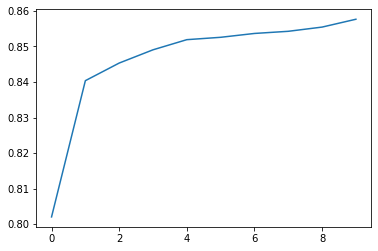

In [ ]:
plt.plot(range(10),d['accuracy'])

In [ ]:
pred = model.predict(test_image) # prediction of all 1000 images

In [ ]:
p = np.argmax(pred,axis=1)

In [ ]:
print(p[0:10])
print(test_label[0:10])

[9 2 1 1 6 1 4 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(p,test_label)
print(cm)

[[792   1  20  15   0   0 118   0   4   0]
 [  4 961   6  11   1   0   5   0   1   0]
 [ 12   2 626   9  40   0  93   0   7   0]
 [ 70  27  15 878  25   0  62   0  10   0]
 [  8   6 254  51 882   0 201   0   5   0]
 [  1   0   0   1   2 907   1  21   7  19]
 [ 97   1  70  28  45   0 493   0  10   0]
 [  1   0   1   3   1  80   0 954   5  53]
 [ 15   2   8   4   4   3  26   0 951   1]
 [  0   0   0   0   0  10   1  25   0 927]]


In [ ]:
import numpy as np
i = 100 #image number
print(test_image[i].shape)
class_name = ['Tshirt/Top','Trouser','PullOver','Dress','Coat','Sandal','shirt','sneakers','bag','ankleboot']
print(pred[i])
print('Predicted Label', tf.argmax(pred[i]).numpy())
print("Predicted Class", class_name[tf.argmax(pred[i]).numpy()])
print('Target Class', class_name[test_label[i]])
print('probability', tf.reduce_max(pred[i]).numpy()*100)
plt.figure(figsize =(2,2))
plt.imshow(test_image[i])


(28, 28)


IndexError: ignored

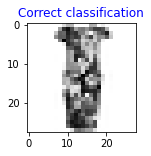

In [ ]:
plt.figure(figsize =(2,2))
plt.imshow(test_image[i],cmap=plt.cm.binary)
pc = class_name[tf.argmax(pred[i]).numpy()]
tc = class_name[test_label[i]]
if pc==tc:
  plt.title('Correct classification',c='b')
else:
  plt.title('Correct classification',c='r')

In [ ]:
#prediction of single line
i =10
img = test_image[i]
print(img.shape)
img = tf.expand_dims(img,0)
print(img.shape)
pred = model.predict(img)
print(pred[0])
print('Predicted Label', tf.argmax(pred[0]).numpy())
print('Predicted Class', class_name[tf.argmax(pred[0]).numpy()])
print('Probability', tf.reduce_max(pred[0]).numpy()*100)

(28, 28)
(1, 28, 28)
[4.47558763e-04 1.84266130e-03 1.15590684e-01 6.55570941e-04
 8.52237880e-01 2.06961470e-09 2.91889943e-02 1.64637429e-10
 3.67376524e-05 9.91085769e-10]
Predicted Label 4
Predicted Class Coat
Probability 85.223788022995
